<B>Ingest Data</B>

In [195]:
#load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [150]:
#read the dataset into the notebook
df = pd.read_csv('heart.csv')

In [151]:
#Dataframe size
print("Rows:", len(df))
print("Columns:", df.shape[1])

Rows: 303
Columns: 14


In [152]:
#Dataframe type
type(df)

pandas.core.frame.DataFrame

<B>Exploratory Data Analysis</B>

In [201]:
#Look at the first 5 rows to learn more about the data
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,1,...,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,1,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,1,0,0,0,1,0,0,1,0


There are 13 attributes and one target variable. From the description of the dataset on Kaggle...

1. age 
2. sex 
3. cp: chest pain type (4 values) 
4. trestbps: resting systolic blood pressure
5. chol: serum cholestoral in mg/dl 
6. fbs: fasting blood sugar > 120 mg/dl
7. restecg: resting electrocardiographic results (values 0,1,2)
8. thalach: maximum heart rate achieved 
9. exang: exercise induced angina 
10. oldpeak: ST depression induced by exercise relative to rest 
11. slope: the slope of the peak exercise ST segment 
12. cs: number of major vessels (0-3) colored by flourosopy 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

14. (target variable) target: 0 = no heart disease; 1 = heart disease

Additional description of each variable...

age, Float

sex - Category
0 = female
1 = male

cp, chest pain, Category
1 = typical angina,
2 = atypical angina,
3 = non-anginal pain,
4 = asymptomatic

restbp, resting blood pressure (in mm Hg), Float

chol, serum cholesterol in mg/dl, Float

fbs, fasting blood sugar, Category
0 = >=120 mg/dl
1 = <120 mg/dl

restecg, resting electrocardiographic results, Category
1 = normal
2 = having ST-T wave abnormality
3 = showing probable or definite left ventricular hypertrophy

thalach, maximum heart rate achieved, Float

exang, exercise induced angina, Category
0 = no
1 = yes

oldpeak, ST depression induced by exercise relative to rest. Float

slope, the slope of the peak exercise ST segment, Category
1 = upsloping
2 = flat
3 = downsloping

ca, The number of major blood vessels(0-3) supplying blood to heart blocked, Float

thal, thalium heart scan, Category
3 = normal (no cold spots)
6 = fixed defect (cold spots during rest and exercise)
7 = reversible defect (when cold spots only appear during exercise)

(target) (predicted attribute): diagnosis of heart disease (angiographic disease status) — Value 0: < 50% diameter narrowing — Value 1: > 50% diameter narrowing

In [154]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [155]:
#Let's look at some basic statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<B>Data Cleaning and Preparation</B>

In [156]:
# identify any missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [157]:
# identify any NA values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [158]:
#check for duplicates
df.duplicated().sum()

1

In [159]:
#drop duplicates, then check again
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [160]:
#how many subjects of each gender? (0=female, 1=male)
df_target = df.groupby("sex").size()
df_target

sex
0     96
1    206
dtype: int64

In [161]:
#how many subjects have heart disease? (0=no, 1=yes)
df_target = df.groupby("target").size()
df_target

target
0    138
1    164
dtype: int64

<B>Data Visualization</B>

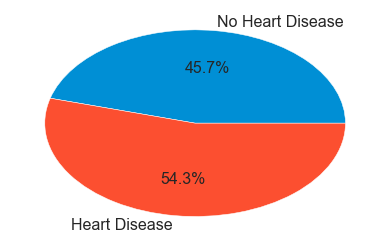

In [162]:
plt.pie(df_target.values, labels = ["No Heart Disease", "Heart Disease"], autopct='%1.1f%%', radius = 1.0, textprops = {"fontsize" : 16}) 
plt.show()

In [163]:
#what are the age ranges, mean, and distribution?
minAge=min(df.age)
maxAge=max(df.age)
meanAge=df.age.mean()
print('Min Age :', minAge)
print('Max Age :', maxAge)
print("Mean Age : "+"{:.2f}".format(meanAge));

Min Age : 29
Max Age : 77
Mean Age : 54.42


Text(0.5,1,'Age distribution')

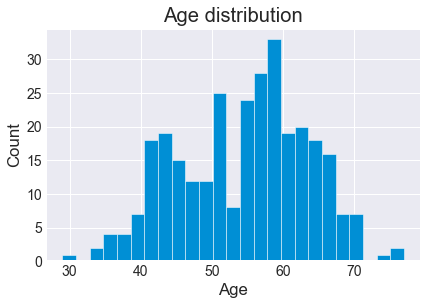

In [164]:
plt.hist(df['age'], bins = 25)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution')

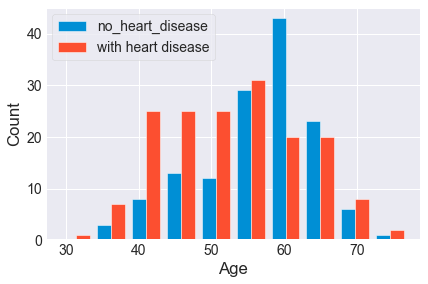

In [165]:
#distribution of heart disease by age
plt.hist([df[df.target==0].age, df[df.target==1].age], bins = 10, label = ["no_heart_disease","with heart disease"])
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

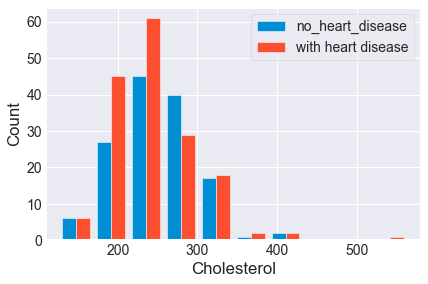

In [166]:
#distribution of heart disease by cholesterol levels
plt.hist([df[df.target==0].chol, df[df.target==1].chol], bins = 10, label = ["no_heart_disease","with heart disease"])
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.legend()
plt.show()

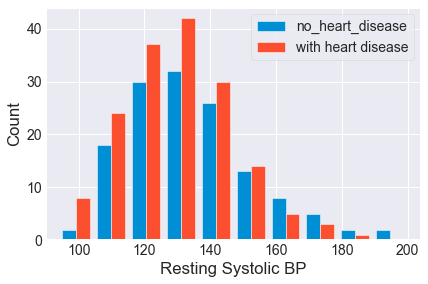

In [196]:
#distribution of heart disease by resting blood pressure
plt.hist([df[df.target==0].trestbps, df[df.target==1].trestbps], bins = 10, label = ["no_heart_disease","with heart disease"])
plt.xlabel("Resting Systolic BP")
plt.ylabel("Count")
plt.legend()
plt.show()

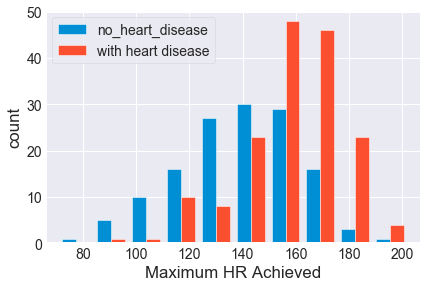

In [197]:
#distribution of heart disease by maximum heart rate achieved
plt.hist([df[df.target==0].thalach, df[df.target==1].thalach], bins = 10, label = ["no_heart_disease","with heart disease"])
plt.xlabel("Maximum HR Achieved")
plt.ylabel("count")
plt.legend()
plt.show()

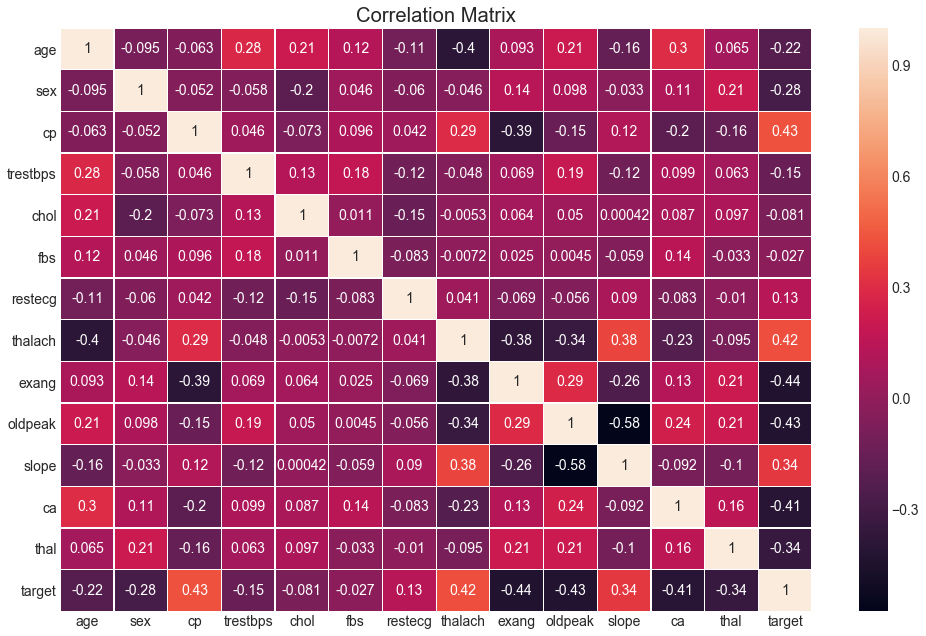

In [169]:
#Correlation Matrix
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linewidth=0.2)
plt.title("Correlation Matrix")
plt.show()

In [170]:
#Correlation with target
df.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.432080
thalach     0.419955
slope       0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trestbps   -0.146269
age        -0.221476
sex        -0.283609
thal       -0.343101
ca         -0.408992
oldpeak    -0.429146
exang      -0.435601
Name: target, dtype: float64

Chest pain is most positively correlated with the target, and exercised induced angina is most negatively correlated with the target

<B>Machine Learning</B>

The next step is to implement some machine learning algorithms to see if we can predict the target variable of heart disease based on the 13 input variables. This is a binary supervised classification problem.

In [173]:
#Convert categorical variables into indicator (dummy) variables
cp_1 = pd.get_dummies(df['cp'], prefix = "cp")
restecg_1 = pd.get_dummies(df['restecg'], prefix = "restecg")
slope_1 = pd.get_dummies(df['slope'], prefix = "slope")
thal_1 = pd.get_dummies(df['thal'], prefix = "thal")

In [174]:
frames = [df, cp_1, restecg_1, slope_1, thal_1]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,3,145,233,1,0,150,0,2.3,...,1,0,0,1,0,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,1,0,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,1,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,0,1,0,0,1,0


In [175]:
#Then remove the original columns
df = df.drop(columns = [ 'cp', 'restecg', 'slope', 'thal'])
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,1,...,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,1,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,1,0,0,0,1,0,0,1,0


In [176]:
#Separate the target variable column from the dataframe
y = df.target.values
X = df.drop(columns="target")

In [177]:
#Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [178]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(241, 23)
(241,)
(61, 23)
(61,)


In [179]:
# Normalize the Data
from sklearn.preprocessing import Normalizer 
scaler = Normalizer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Model Selection

1. Logistic Regression
2. Support Vector Machine
3. Decision Tree
4. Naive Bayes
5. Random Forest Classifier

In [180]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report , accuracy_score
report = classification_report(y_test,y_pred)
print(report)
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.48      0.62        29
           1       0.67      0.94      0.78        32

    accuracy                           0.72        61
   macro avg       0.77      0.71      0.70        61
weighted avg       0.77      0.72      0.70        61

0.7213114754098361


In [181]:
#Support Vector Machine Classifier
from sklearn.svm import SVC
model2 = SVC(verbose=True)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
report_svc = classification_report(y_test,y_pred2)
print(report_svc)
print(accuracy_score(y_test,y_pred2))

[LibSVM]              precision    recall  f1-score   support

           0       0.85      0.59      0.69        29
           1       0.71      0.91      0.79        32

    accuracy                           0.75        61
   macro avg       0.78      0.75      0.74        61
weighted avg       0.78      0.75      0.75        61

0.7540983606557377


In [182]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(criterion="entropy",max_depth=200)
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)
report_dtree = classification_report(y_pred3,y_test)
print(report_dtree)
print(accuracy_score(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

0.8360655737704918


In [183]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
report_nb = classification_report(y_pred_nb,y_test)
print(report_nb)
acc = nb.score(X_test,y_test)*100
print(acc)

              precision    recall  f1-score   support

           0       0.90      0.74      0.81        35
           1       0.72      0.88      0.79        26

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61

80.32786885245902


In [184]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=1000, random_state=1)
model_rf.fit(X_train,y_train)
y_pred_rf = model_rf.predict(X_test)
report_rf2 = classification_report(y_test,y_pred_rf)
print(report_rf2)
print(accuracy_score(y_pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

0.8360655737704918


In [185]:
#Confusion Matrixes
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,y_pred)
cm_svc = confusion_matrix(y_test,y_pred2)
cm_dtree = confusion_matrix(y_test,y_pred3)
cm_rf = confusion_matrix(y_test,y_pred_rf)
cm_nb = confusion_matrix(y_test,y_pred_nb)

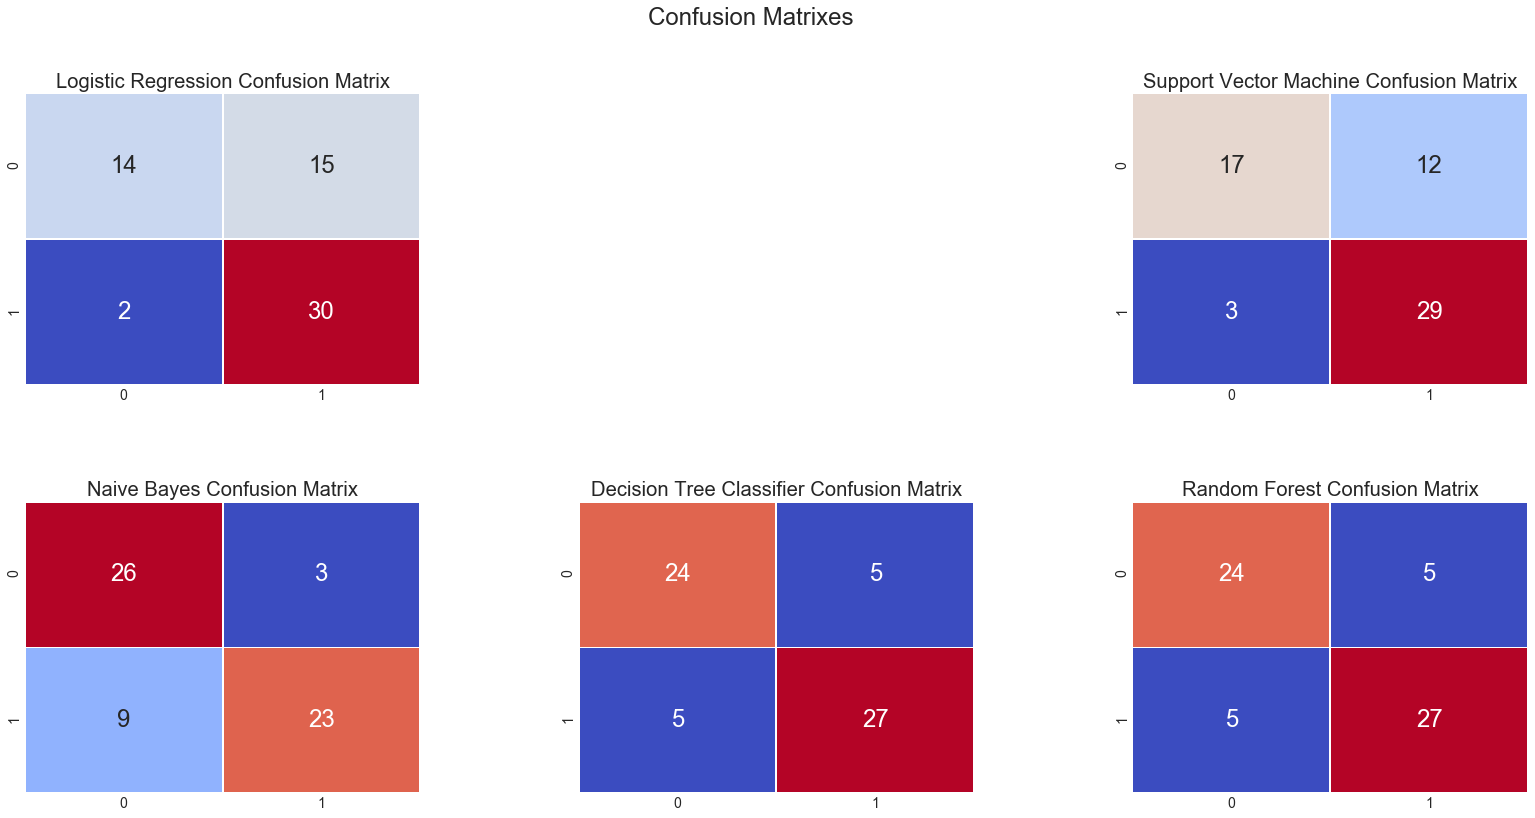

In [194]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True, cmap="coolwarm", linewidth=1, fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svc,annot=True, cmap="coolwarm",linewidth=1, fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True, cmap="coolwarm",linewidth=1, fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtree,annot=True, cmap="coolwarm",linewidth=1, fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True, cmap="coolwarm",linewidth=1, fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()